In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for interactive visualizations
import plotly.express as px

# Set plot style
sns.set_style("whitegrid")


In [5]:
# Load the dataset
data = pd.read_csv('COVID_data.csv')

# Display dataset structure
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457250 entries, 0 to 457249
Data columns (total 40 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   country                                  457250 non-null  object 
 1   date                                     457250 non-null  object 
 2   new_cases                                454937 non-null  float64
 3   total_cases                              457250 non-null  int64  
 4   new_deaths                               455574 non-null  float64
 5   total_deaths                             457250 non-null  int64  
 6   weekly_cases                             453658 non-null  float64
 7   weekly_deaths                            454324 non-null  float64
 8   weekly_pct_growth_cases                  311973 non-null  float64
 9   weekly_pct_growth_deaths                 206224 non-null  float64
 10  biweekly_cases                  

,country,date,new_cases,total_cases,new_deaths,total_deaths,weekly_cases,weekly_deaths,weekly_pct_growth_cases,weekly_pct_growth_deaths,...,cfr_100_cases,cfr_short_term,days_since_100_total_cases,days_since_5_total_deaths,days_since_1_total_cases_per_million,days_since_0_1_total_deaths_per_million,days_since_100_total_cases_and_5m_pop,total_deaths_last12m,total_deaths_per_100k_last12m,total_deaths_per_million_last12m
0,Afghanistan,2020-01-04,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,-86.0,-91.0,-81.0,-91.0,-86.0,NaN,NaN,NaN
1,Afghanistan,2020-01-05,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,-85.0,-90.0,-80.0,-90.0,-85.0,NaN,NaN,NaN
2,Afghanistan,2020-01-06,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,-84.0,-89.0,-79.0,-89.0,-84.0,NaN,NaN,NaN
3,Afghanistan,2020-01-07,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,-83.0,-88.0,-78.0,-88.0,-83.0,NaN,NaN,NaN
4,Afghanistan,2020-01-08,0.0,0,0.0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,-82.0,-87.0,-77.0,-87.0,-82.0,NaN,NaN,NaN


In [12]:
# Drop rows with missing values in key columns
data = data.dropna(subset=['total_cases', 'total_deaths'])

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Verify changes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457250 entries, 0 to 457249
Data columns (total 40 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   country                                  457250 non-null  object        
 1   date                                     457250 non-null  datetime64[ns]
 2   new_cases                                454937 non-null  float64       
 3   total_cases                              457250 non-null  int64         
 4   new_deaths                               455574 non-null  float64       
 5   total_deaths                             457250 non-null  int64         
 6   weekly_cases                             453658 non-null  float64       
 7   weekly_deaths                            454324 non-null  float64       
 8   weekly_pct_growth_cases                  311973 non-null  float64       
 9   weekly_pct_growth_deaths  

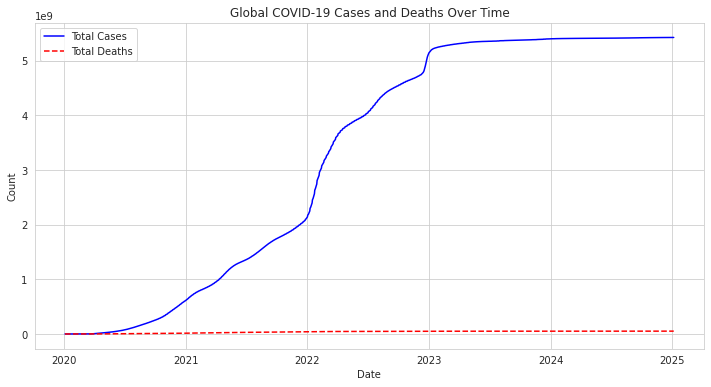

In [13]:
# Group data by date for global statistics
global_data = data.groupby('date').sum().reset_index()

# Ensure 'total_cases' and 'total_deaths' are numeric
global_data['total_cases'] = pd.to_numeric(global_data['total_cases'], errors='coerce')
global_data['total_deaths'] = pd.to_numeric(global_data['total_deaths'], errors='coerce')

# Flatten the 'date', 'total_cases', and 'total_deaths' columns to 1D arrays
dates = global_data['date'].values
total_cases = global_data['total_cases'].values
total_deaths = global_data['total_deaths'].values

# Plot global cases and deaths over time
plt.figure(figsize=(12, 6))
plt.plot(dates, total_cases, label='Total Cases', color='blue')
plt.plot(dates, total_deaths, label='Total Deaths', color='red', linestyle='--')
plt.title('Global COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


Index(['country', 'date', 'new_cases', 'total_cases', 'new_deaths',
       'total_deaths', 'weekly_cases', 'weekly_deaths',
       'weekly_pct_growth_cases', 'weekly_pct_growth_deaths', 'biweekly_cases',
       'biweekly_deaths', 'biweekly_pct_growth_cases',
       'biweekly_pct_growth_deaths', 'new_cases_per_million',
       'new_deaths_per_million', 'total_cases_per_million',
       'total_deaths_per_million', 'weekly_cases_per_million',
       'weekly_deaths_per_million', 'biweekly_cases_per_million',
       'biweekly_deaths_per_million', 'total_deaths_per_100k',
       'new_deaths_per_100k', 'new_cases_7_day_avg_right',
       'new_deaths_7_day_avg_right', 'new_cases_per_million_7_day_avg_right',
       'new_deaths_per_million_7_day_avg_right',
       'new_deaths_per_100k_7_day_avg_right', 'cfr', 'cfr_100_cases',
       'cfr_short_term', 'days_since_100_total_cases',
       'days_since_5_total_deaths', 'days_since_1_total_cases_per_million',
       'days_since_0_1_total_deaths_per_

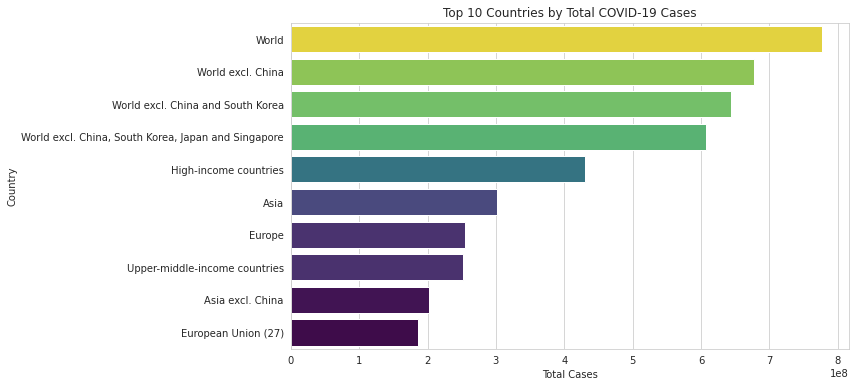

In [27]:
# Step: Get the latest data for all countries
latest_data = data[data['date'] == data['date'].max()]

# Step: Top 10 countries by total cases
top_countries = latest_data.sort_values(by='total_cases', ascending=False).head(10)

# Inspect the columns of the 'top_countries' dataframe to verify the column name for countries
print(top_countries.columns)

# Bar plot for top countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='total_cases', y='country', palette='viridis', hue='total_cases', legend=False)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()


In [24]:
# Calculate case fatality ratio
latest_data.loc[:,'case_fatality_ratio'] = latest_data['total_deaths'] / latest_data['total_cases']

# Top 5 countries with highest fatality rates
high_fatality = latest_data.sort_values(by='case_fatality_ratio', ascending=False).head(5)
print("Top 5 Countries by Case Fatality Ratio:")
print(high_fatality[['country', 'case_fatality_ratio']])


Top 5 Countries by Case Fatality Ratio:
        country  case_fatality_ratio
453591    Yemen             0.180745
389576    Sudan             0.078852
396892    Syria             0.055082
376773  Somalia             0.049791
320074     Peru             0.048798


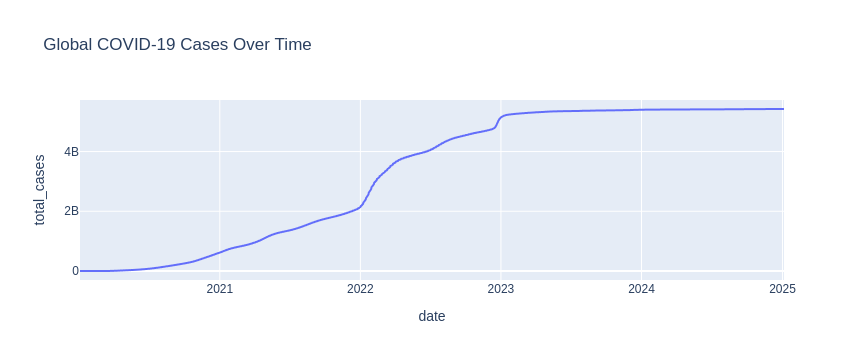

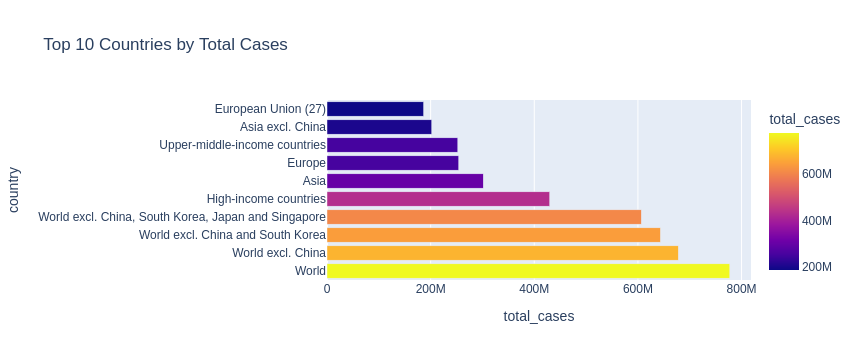

In [29]:
# Interactive line plot for global trends
fig = px.line(global_data, x='date', y='total_cases', title='Global COVID-19 Cases Over Time')
fig.show()

# Interactive bar plot for top countries
fig = px.bar(top_countries, x='total_cases', y='country', orientation='h',
             title='Top 10 Countries by Total Cases', color='total_cases')
fig.show()
